<a href="https://colab.research.google.com/github/quochungtran/MLOps_Marathon_2023_T-NEXTS/blob/quochung/mlops_lab1_prob1_eda__quochung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%file ../requirements.txt
pyspark
lightgbm

Overwriting ../requirements.txt


In [2]:
!pip install pyspark \
            lightgbm \
            tabulate \
            pyarrow  \
            xgboost  \
            mlxtend  \
            imblearn

Defaulting to user installation because normal site-packages is not writeable


# Import the library 

In [3]:
import pandas as pd 
import numpy as np
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

import lightgbm as lgb

from sklearn.dummy import DummyClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    # confusion_matrix,
    roc_auc_score,
    RocCurveDisplay,
    # plot_roc_curve,
)

# To be used for data scaling and encoding
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    RobustScaler,
)
from sklearn.impute import SimpleImputer

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# set the background for the graphs
plt.style.use("ggplot")

# For pandas profiling
# from pandas_profiling import ProfileReport

# Printing style
from tabulate import tabulate

# To supress warnings
import warnings

# date time
from datetime import datetime

import os

In [4]:
DATA_FOLDER = "../data/"

In [5]:
DATA_FILE_ZIP = DATA_FOLDER + "data_phase-1.zip" # you could fix the path in your local

In [6]:
!unzip $DATA_FILE_ZIP -d ../data
!rm $DATA_FILE_ZIP

unzip:  cannot find or open ../data/data_phase-1.zip, ../data/data_phase-1.zip.zip or ../data/data_phase-1.zip.ZIP.
rm: cannot remove '../data/data_phase-1.zip': No such file or directory


# TL;DR

# Exploration (EDA)

Exploratory data analysis to understand the signals and nuances of our dataset. It's a cyclical process that can be done at various points of our development process (before/after labeling, preprocessing, etc. depending on how well the problem is defined).



## Prob_1 / Train dataset

- Label: Is Fraud (1) or Not (0)
- Train size: 134,201
- Test size: 297,945


The ML problem at hand involves predicting fraudulent transactions in a financial dataset.
The target variable is 'label', which is a binary variable indicating whether a transaction is fraudulent or not.

Make a read_parquet function to reuse 


In [7]:
import pandas as pd
import pyarrow.parquet as pq

# read_parquet
def read_parquet(path):
    data = pq.read_table(source=path).to_pandas()
    return data

In [8]:
DATA_FOLDER = "../data/"

In [9]:
path = DATA_FOLDER + 'phase-1/prob-1/raw_train.parquet'

## To be define in local file path or S3 bucket path
df = read_parquet(path)

df.to_csv(DATA_FOLDER + 'phase-1/prob-1/prob_1.csv')

df.head(5)


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,label,feature14,feature15,feature16
0,Site engineer,grocery_pos,8.600,48230,40.213,-85.204,47583,42.508,-83.168,65.596,3,5,1,1,8.018,1.029,58.911
1,Site engineer,gas_transport,316.840,48230,44.379,-82.860,47583,42.662,-81.967,64.729,6,5,1,1,11.769,1.106,64.431
2,Site engineer,grocery_pos,294.890,48230,42.951,-84.936,47583,42.580,-82.409,65.435,3,5,1,1,7.996,0.900,57.545
3,Site engineer,shopping_net,831.080,48230,39.372,-84.894,47583,41.949,-83.920,64.990,23,6,1,1,8.768,1.063,62.681
4,Site engineer,health_fitness,1063.840,48230,41.227,-83.228,47583,41.545,-82.123,65.316,23,6,1,1,8.816,0.722,63.084


## Prob_2 / Train dataset


Source: MLOps

- Label: Good (1) or Bad (0)
- Train size: 60,000
- Test size: 40,000


The machine learning problem aims to predict credit risk and assist financial institutions in making informed lending decisions based on various features.

The total train dataset consists of 60,000 records and the test dataset consists of 40,000 records.

In [10]:
path = DATA_FOLDER + 'phase-1/prob-2/raw_train.parquet'

## To be define in local file path or S3 bucket path
df2 = read_parquet(path)

df2.to_csv(DATA_FOLDER + 'phase-1/prob-2/prob_2.csv')

df2.head(5)


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,label
0,V1,4.782,V2,V8,1337.025,V4,V4,2.000,V2,V0,4.000,V2,35.689,none,V1,1.000,V2,1.000,none,yes,0
1,V3,22.765,V4,V2,1664.415,V0,V4,4.000,V1,V0,2.000,V0,23.266,none,V1,2.000,V2,1.000,none,yes,0
2,V3,7.462,V2,V3,750.653,V3,V2,4.000,V2,V0,4.000,V2,34.061,stores,V0,1.000,V2,1.000,yes,yes,0
3,V3,23.718,V4,V7,4829.002,V4,V2,4.000,V1,V0,4.000,V3,62.477,none,V1,2.000,V1,1.000,none,yes,0
4,V3,13.769,V3,V3,3559.956,V3,V4,1.000,V1,V0,4.000,V2,41.999,bank,V1,1.000,V2,1.000,yes,yes,0


# EDA prob_1

In [11]:
print(f'describe of Prob_1\n\n',df.describe())

describe of Prob_1

         feature3   feature4   feature5   feature6    feature7   feature8  \
count 134201.000 134201.000 134201.000 134201.000  134201.000 134201.000   
mean      98.995  50721.259     37.237    -91.839  293853.951     37.235   
std      205.882  29578.182      5.720     16.339  552713.290      5.385   
min        1.000   1106.000     11.873   -173.220     194.000     18.798   
25%        9.900  28152.000     33.368    -98.893   16719.000     33.603   
50%       48.590  46222.000     37.492    -87.142   62009.000     37.545   
75%       90.840  78045.000     41.133    -79.599  247530.000     40.976   
max    15861.400  99791.000     76.846    -63.066 2906700.000     71.485   

        feature9  feature10  feature11  feature12  feature13      label  \
count 134201.000 134201.000 134201.000 134201.000 134201.000 134201.000   
mean     -91.845     48.273     12.728      3.478      1.503      0.063   
std       16.224     16.670      7.049      1.994      0.536      0.2

In [12]:
df.info()

#checkling NaN values
print(f'checkling NaN values:',df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134201 entries, 0 to 134200
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   feature1   134201 non-null  object 
 1   feature2   134201 non-null  object 
 2   feature3   134201 non-null  float64
 3   feature4   134201 non-null  int64  
 4   feature5   134201 non-null  float64
 5   feature6   134201 non-null  float64
 6   feature7   134201 non-null  int64  
 7   feature8   134201 non-null  float64
 8   feature9   134201 non-null  float64
 9   feature10  134201 non-null  float64
 10  feature11  134201 non-null  int64  
 11  feature12  134201 non-null  int64  
 12  feature13  134201 non-null  int64  
 13  label      134201 non-null  int64  
 14  feature14  134201 non-null  float64
 15  feature15  134201 non-null  float64
 16  feature16  134201 non-null  float64
dtypes: float64(9), int64(6), object(2)
memory usage: 17.4+ MB
checkling NaN values: feature1     0
feature2  

We have no missing data

**Unique values for Category columns and Unique values for Numberic columns**

In [13]:
print(f'Unique values of Object values\n', df.select_dtypes(include="object").nunique(), '\n')
print(f'Unique values of Numberic values\n', df.select_dtypes(exclude="object").nunique(), '\n')

# let's view the statistical summary of the categorical columns in the data
print(df.describe(include="object").T)

Unique values of Object values
 feature1    481
feature2     14
dtype: int64 

Unique values of Numberic values
 feature3      28125
feature4        893
feature5     134201
feature6     134201
feature7        739
feature8     133688
feature9     133967
feature10    134201
feature11        24
feature12         7
feature13         3
label             2
feature14    134201
feature15    134201
feature16    134201
dtype: int64 

           count unique                             top   freq
feature1  134201    481  Therapist, speech and language   1026
feature2  134201     14                     grocery_pos  14217


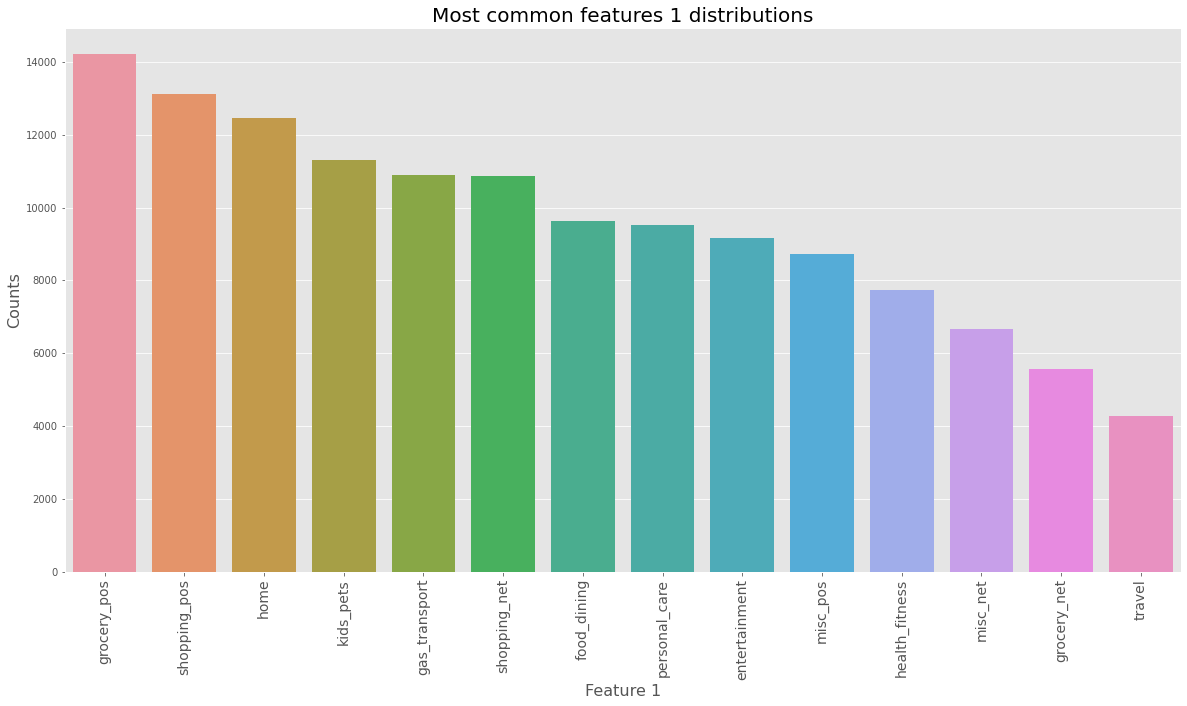

In [14]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


feature2s, feature2_counts = zip(*Counter(df.feature2.values).most_common())
plt.figure(figsize=(20,10))
ax = sns.barplot(x=list(feature2s), y=list(feature2_counts))
plt.title("Most common features 1 distributions", fontsize=20)
plt.xlabel("Feature 1", fontsize=16)
ax.set_xticklabels(feature2s, rotation=90, fontsize=14)
plt.ylabel("Counts", fontsize=16)
plt.show()

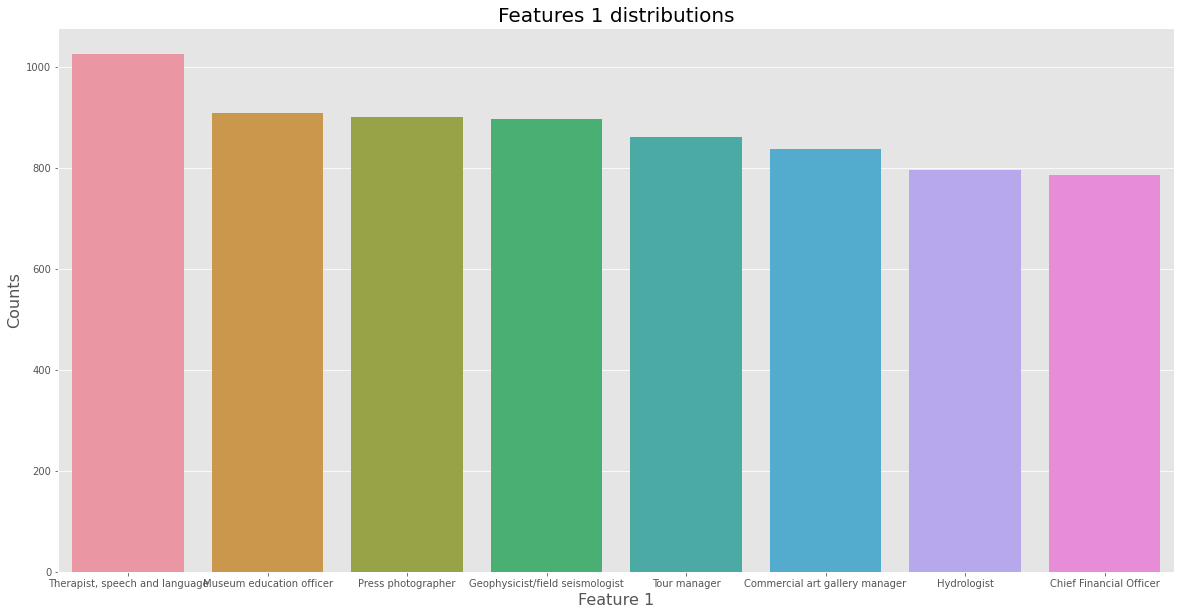

In [15]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


feature1s, feature1_counts = zip(*Counter(df.feature1.values).most_common())
plt.figure(figsize=(20,10))
ax = sns.barplot(x=list(feature1s)[:8], y=list(feature1_counts)[:8])
plt.title("Features 1 distributions", fontsize=20)
plt.xlabel("Feature 1", fontsize=16)
plt.ylabel("Counts", fontsize=16)
plt.show()

# Distribution of category columns statistics and label column statistic


In [16]:
# Below function prints unique value counts and percentages for the category/object type variables
import numpy as np

def category_unique_value():
    for cat_cols in (
        df.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
    ):
        print("Unique values and corresponding data counts for feature: " + cat_cols)
        print("-" * 90)
        df_temp = pd.concat(
            [
                df[cat_cols].value_counts(),                          # Count
                df[cat_cols].value_counts(normalize=True) * 100,      # Percentage
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)

category_unique_value()
# feature1 therefore can be 'jobs' column 
# feature2 therefore can be 'job_sector' column 

Unique values and corresponding data counts for feature: feature1
------------------------------------------------------------------------------------------
                                                    Count  Percentage
Therapist, speech and language                       1026       0.765
Museum education officer                              909       0.677
Press photographer                                    902       0.672
Geophysicist/field seismologist                       898       0.669
Tour manager                                          861       0.642
Commercial art gallery manager                        837       0.624
Hydrologist                                           797       0.594
Chief Financial Officer                               787       0.586
Consulting civil engineer                             783       0.583
Journalist, broadcasting                              777       0.579
Food technologist                                     771       0.575
Buy

In [17]:
def num_unique_value():

    print("Unique values and corresponding data counts for label: ")
    print("-" * 90)
    df_temp = pd.concat(
        [
            df['label'].value_counts(),                          # Count
            df['label'].value_counts(normalize=True) * 100,      # Percentage
        ],
        axis=1,
    )
    df_temp.columns = ["Count", "Percentage"]
    print(df_temp)
    print("-" * 90)

num_unique_value()

Unique values and corresponding data counts for label: 
------------------------------------------------------------------------------------------
    Count  Percentage
0  125704      93.668
1    8497       6.332
------------------------------------------------------------------------------------------


We see that label for fraud transaction is 6.33% of the train dataset

** This is classification problem with 2 classes:

- 0: No-Fraud (possitive cases)
- 1: Fraud (negative cases)

We have 8497 negative cases and 125704 postive cases out of 134201 cases in train dataset . There is imbalance in the dataset between classes. In order to build prediction models forfraud detection, some metrics will be used: 
- Accuracy
- Precision and recall
- ROC and AUC **

# Visualize The Correlation Between Dependent And Independent Dependent Features

From the 2 heatmap graphs below,the most important features to understand fraudulent transaction, are: Feature 5, Feature 6, Feature 8, Feature 9 

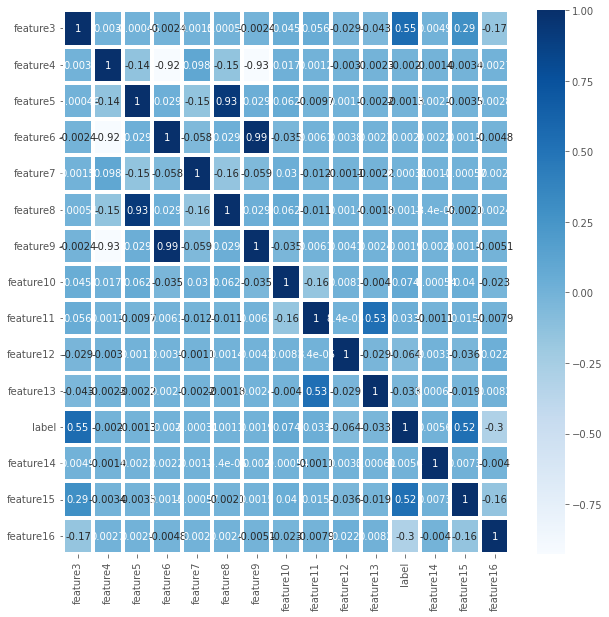

In [18]:
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

# To be used for missing value imputation
from sklearn.impute import SimpleImputer


corrmat = df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(10,10))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues",linewidths=3.5,
    linecolor='white')

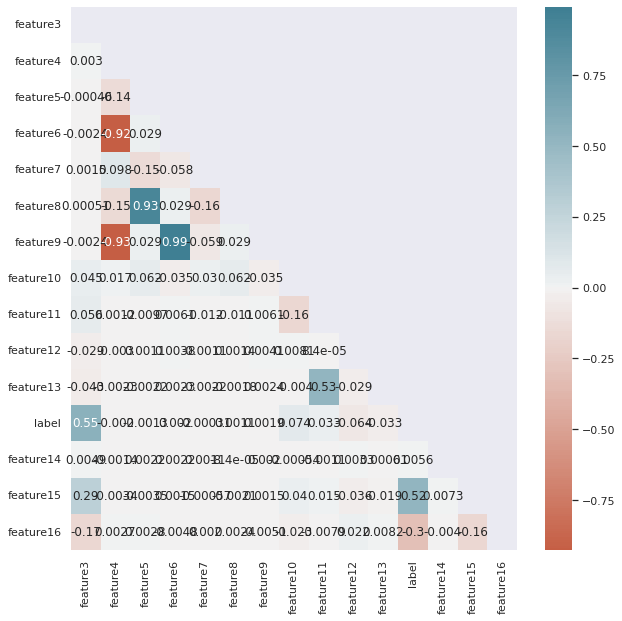

In [19]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(rc={"figure.figsize": (10, 10)})

sns.heatmap(
    df.corr(),
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True,
    mask=mask,
    center=0,
)
plt.show()

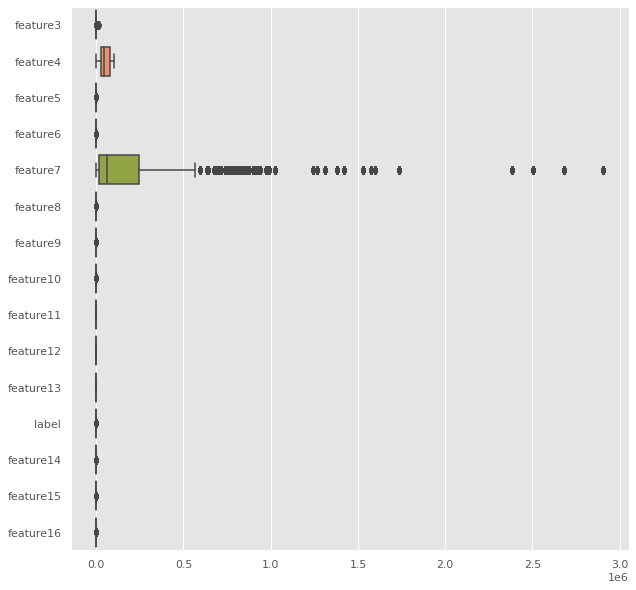

In [20]:
# This grapth show the distribution of each numberic features to find outliers values
from mlxtend.preprocessing import standardize
import seaborn as sns
from matplotlib import pyplot as plt
numeric_columns = df.select_dtypes(include=[np.int64, np.float64]).columns.unique().to_list()
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 10))
sns.boxplot(data=df[numeric_columns], orient='h')
plt.show()

Feature 7 has top outliers distribution but since the correlation with Label column is not much so we dont need to worry. 

# Percentage on bar chart for Categorical Features
For the categorical variables, it is best to analyze them at percentage of total on bar charts.
Below function takes a category column as input and plots bar chart with percentages on top of each bar

## Bi-variate Analysis
Goal of Bi-variate analysis is to find inter-dependencies between features.
# Label vs. All Categorical Columns

In [21]:
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
import pandas as pd
import numpy as np

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

In [22]:
# Create a function that returns a Pie chart and a Bar Graph for the categorical variables:

def cat_view(df: pd.DataFrame, x, label):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm

    color1 = cm.inferno(np.linspace(0.4, 0.8, 30))
    color2 = cm.viridis(np.linspace(0.4, 0.8, 30))
    sns.set_palette("cubehelix")
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))

    """
    Draw a Pie Chart on first subplot.
    """
    s = df.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct / 100.0 * np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax[0].pie(
        mydata_values,
        autopct=lambda pct: func(pct, mydata_values),
        textprops=dict(color="w"),
    )

    ax[0].legend(
        wedges,
        mydata_index,
        title=x.capitalize(),
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
    )

    plt.setp(autotexts, size=12)

    ax[0].set_title(f"{x.capitalize()} Pie Chart")

    """
    Draw a Bar Graph on second subplot.
    """

    df = pd.pivot_table(
        df, index=[x], columns=[label], values=["label"], aggfunc=len
    )

    labels = df.index.tolist()
    no = df.values[:, 1].tolist()
    yes = df.values[:, 0].tolist()

    l = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax[1].bar(
        l - width / 2, no, width, label="Existing Customer", color=color1
    )
    rects2 = ax[1].bar(
        l + width / 2, yes, width, label="Attrited Customer", color=color2
    )

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[1].set_ylabel("Scores")
    ax[1].set_title(f"{x.capitalize()} Bar Graph")
    ax[1].set_xticks(l)
    ax[1].set_xticklabels(labels)
    ax[1].legend()

    def autolabel(rects):

        """Attach a text label above each bar in *rects*, displaying its height."""

        for rect in rects:
            height = rect.get_height()
            ax[1].annotate(
                "{}".format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                fontsize="medium",
                ha="center",
                va="bottom",
            )

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

    """
    Draw a Stacked Bar Graph on bottom.
    """

    sns.set(palette="tab10")
    tab = pd.crosstab(df[x], df[label], normalize="index")

    tab.plot.bar(stacked=True, figsize=(16, 3))
    plt.title(x.capitalize() + " Stacked Bar Plot")
    plt.legend(loc="upper right", bbox_to_anchor=(0, 1))
    plt.show()

In [24]:
#if __name__ == "__main__":
  #cat_view(df, "feature1", "label")
  #cat_view(df, "feature2", "label")

# LDA Analyse

First, we performed a principal component analysis to reduce the number of explanatory variables in order to visualize the data given their high dimensionality. Then, we created the sets that we will use later for cross-validation.

PCA is effected by scale but not nessary because data atributes have same scale

In [25]:
from sklearn.decomposition import PCA

cols = df.select_dtypes(exclude=[np.int64, np.float64]).columns.to_list()
cols.append('label')

X,y = df.drop(columns=cols),  df["label"]

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [26]:
X.head()

,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16
0,8.600,48230,40.213,-85.204,47583,42.508,-83.168,65.596,3,5,1,8.018,1.029,58.911
1,316.840,48230,44.379,-82.860,47583,42.662,-81.967,64.729,6,5,1,11.769,1.106,64.431
2,294.890,48230,42.951,-84.936,47583,42.580,-82.409,65.435,3,5,1,7.996,0.900,57.545
3,831.080,48230,39.372,-84.894,47583,41.949,-83.920,64.990,23,6,1,8.768,1.063,62.681
4,1063.840,48230,41.227,-83.228,47583,41.545,-82.123,65.316,23,6,1,8.816,0.722,63.084


In [27]:
finalDf = pd.concat([principalDf, y], axis = 1) 

In [28]:
finalDf.head()

,principal component 1,principal component 2,label
0,-246280.672,1191.038,1
1,-246280.671,1191.034,1
2,-246280.671,1191.033,1
3,-246280.671,1191.021,1
4,-246280.671,1191.018,1


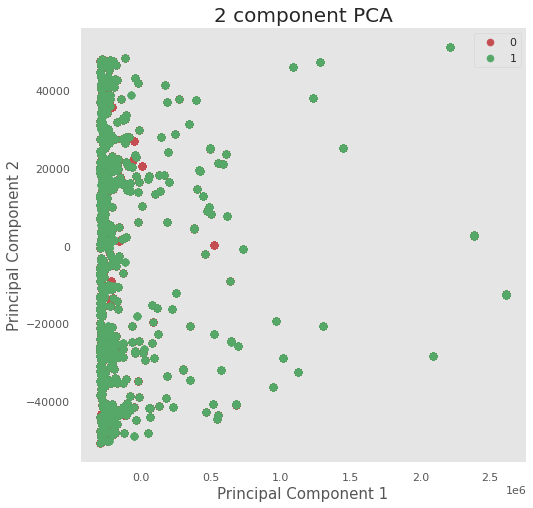

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [30]:
pca.explained_variance_ratio_

array([0.99717195, 0.00282791])

## Feature Engineering 
- Data type conversions: We need to convert the data type of the category variables (Feature 1 and 2) from object to category

In [31]:
category_columns= df.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
df[category_columns] = df[category_columns].astype("category")

## Data Preprocessing

Pre-processing steps:

- Data Split into Dependent and Target sets
- Data Split to Train, Test and Validation sets
Standardize feature names
- Drop unnecessary columns (Client Number, Customer Age, - Dependent Count, Months on Book, Open to Buy, Credit Limit)
- Missing Value/Incorrect Value treatment
- Encoding
- Scaling/Outlier treatment

**Building data transformer functions and classes**

Firstly we'll work on building models individually after data pre-processing, and later we'll build an ML pipeline to run end to end process of pre-processing and model building. We are creating a data copy for the first part.

In [32]:
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

# Building a function to standardize columns

def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_

# Building a function to drop features

def drop_feature(df: pd.DataFrame, features: list = []):
    df_ = df.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)
        
    return df_

# Building a function to treat incorrect value

def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')
            
    return df_

# Building a custom imputer

def impute_category_unknown(df: pd.DataFrame, fill_value: str):
    df_ = df.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_

# Building a custom data preprocessing class with fit and transform methods for standardizing column names

class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_
    
    
# Building a custom data preprocessing class with fit and transform methods for dropping columns

class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a dataframe without those columns."""
        X_ = drop_feature(X, features=self.features)
        return X_
        
    

# Building a custom data preprocessing class with fit and transform methods for custom value masking

class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_
    
    
# Building a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_
    
# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_

In [33]:
data = df.copy()
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
feature1,134201,481,"Therapist, speech and language",1026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature2,134201,14,grocery_pos,14217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature3,134201.000,NaN,NaN,NaN,98.995,205.882,1.000,9.900,48.590,90.840,15861.400
feature4,134201.000,NaN,NaN,NaN,50721.259,29578.182,1106.000,28152.000,46222.000,78045.000,99791.000
feature5,134201.000,NaN,NaN,NaN,37.237,5.720,11.873,33.368,37.492,41.133,76.846
feature6,134201.000,NaN,NaN,NaN,-91.839,16.339,-173.220,-98.893,-87.142,-79.599,-63.066
feature7,134201.000,NaN,NaN,NaN,293853.951,552713.290,194.000,16719.000,62009.000,247530.000,2906700.000
feature8,134201.000,NaN,NaN,NaN,37.235,5.385,18.798,33.603,37.545,40.976,71.485
feature9,134201.000,NaN,NaN,NaN,-91.845,16.224,-169.020,-98.069,-86.946,-80.010,-69.134
feature10,134201.000,NaN,NaN,NaN,48.273,16.670,23.448,34.950,44.952,58.639,97.121


**Defining the static variables**

In [65]:


# Random state and loss
seed = 1
loss_func = "logloss"

# Test and Validation sizes
test_size = 0.2
val_size = 0.25

# Dependent Varibale Value map
# target_mapper = {"fraud": 1, "not_fraud": 0}


# Splitting the dataset into dependent and independent variable sets
# X,y = data.drop(columns=["label"]),  data["label"].map(target_mapper)
X,y = data.drop(columns=["label"]),  data["label"]


# Split data in Train, Validation and Test sets

In [66]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_size, random_state=seed, stratify=y_temp
)
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (80520, 16) 

Validation Data Shape: 

 (26840, 16) 

Testing Data Shape: 

 (26841, 16)


**Checking the ratio of labels in the target column for each of the data segments**

In [67]:
print("Training: \n", y_train.value_counts(normalize=True))
print("\n\nValidation: \n", y_val.value_counts(normalize=True))
print("\n\nTest: \n", y_test.value_counts(normalize=True))

Training: 
 0   0.937
1   0.063
Name: label, dtype: float64


Validation: 
 0   0.937
1   0.063
Name: label, dtype: float64


Test: 
 0   0.937
1   0.063
Name: label, dtype: float64


# Data processing 

Data pre-processing is one of the the most important parts of the job before starting to train the model with the dataset. We need to impute missing values, fix any illogical data value in columns, convert category columns to numeric (either ordinal, or binary using one-hot encoding), scale the data to deal with the distribution skewness and outliers, before feeding the data to a model.  

We are using the pre-available transformation classes and the custom classes that we created to first fit the training data and then transform the train, validation and test dataset. This is the standard logical practice to keep the influence of test and validation data in the train dataset to prevent/avoid data leakage while training or validating the model.

In [68]:
# To Standardize feature names
feature_name_standardizer = FeatureNamesStandardizer()

X_train = feature_name_standardizer.fit_transform(X_train)
X_val = feature_name_standardizer.transform(X_val)
X_test = feature_name_standardizer.transform(X_test)


# To impute categorical Nulls to Unknown
cat_columns = X_train.select_dtypes(include="category").columns.tolist()
imputer = FillUnknown()

X_train[cat_columns] = imputer.fit_transform(X_train[cat_columns])
X_val[cat_columns] = imputer.transform(X_val[cat_columns])
X_test[cat_columns] = imputer.transform(X_test[cat_columns])

# To encode the data
one_hot = PandasOneHot()

X_train = one_hot.fit_transform(X_train)
X_val = one_hot.transform(X_val)
X_test = one_hot.transform(X_test)


# Scale the numerical columns
robust_scaler = RobustScaler(with_centering=False, with_scaling=True)
num_columns = [
        "feature3",
        "feature4",
        "feature5",
        "feature6",
        "feature7",
        "feature8",
        "feature9",
        "feature10",
        "feature11",
        "feature12",
        "feature13",
        "feature14",
        "feature15",
        "feature16"
    ]

X_train[num_columns] = pd.DataFrame(
    robust_scaler.fit_transform(X_train[num_columns]),
    columns=num_columns,
    index=X_train.index,
)

X_val[num_columns] = pd.DataFrame(
    robust_scaler.transform(X_val[num_columns]), 
    columns=num_columns, 
    index=X_val.index
)

X_test[num_columns] = pd.DataFrame(
    robust_scaler.transform(X_test[num_columns]),
    columns=num_columns,
    index=X_test.index,
)

In [69]:
X_train.head(3)

,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature1_Accommodation manager,"feature1_Accountant, chartered","feature1_Accountant, chartered certified","feature1_Accountant, chartered management",feature1_Accounting technician,feature1_Actuary,feature1_Acupuncturist,feature1_Administrator,"feature1_Administrator, Civil Service","feature1_Administrator, arts","feature1_Administrator, education","feature1_Administrator, local government",feature1_Adult guidance worker,feature1_Advertising account executive,feature1_Advertising account planner,feature1_Advertising copywriter,feature1_Advice worker,feature1_Aeronautical engineer,feature1_Agricultural consultant,feature1_Agricultural engineer,feature1_Aid worker,feature1_Air broker,feature1_Airline pilot,feature1_Ambulance person,feature1_Amenity horticulturist,feature1_Animal technologist,feature1_Applications developer,feature1_Arboriculturist,feature1_Archaeologist,feature1_Architect,feature1_Architectural technologist,feature1_Archivist,feature1_Armed forces logistics/support/administrative officer,feature1_Armed forces operational officer,feature1_Armed forces technical officer,feature1_Armed forces training and education officer,feature1_Art gallery manager,feature1_Arts administrator,feature1_Astronomer,feature1_Audiological scientist,feature1_Automotive engineer,feature1_Barista,feature1_Barrister,feature1_Barrister's clerk,feature1_Best boy,"feature1_Biochemist, clinical",feature1_Biomedical scientist,feature1_Bookseller,feature1_Broadcast engineer,feature1_Broadcast journalist,feature1_Building services engineer,feature1_Building surveyor,"feature1_Buyer, industrial","feature1_Buyer, retail",feature1_Call centre manager,feature1_Camera operator,feature1_Careers adviser,feature1_Charity fundraiser,feature1_Charity officer,feature1_Chartered accountant,feature1_Chartered certified accountant,feature1_Chartered legal executive (England and Wales),feature1_Chartered management accountant,feature1_Chemical engineer,"feature1_Chemist, analytical",feature1_Chief Executive Officer,feature1_Chief Financial Officer,feature1_Chief Operating Officer,feature1_Chief Strategy Officer,feature1_Chief Technology Officer,feature1_Chief of Staff,feature1_Child psychotherapist,feature1_Chiropodist,feature1_Chiropractor,feature1_Civil Service administrator,"feature1_Civil engineer, consulting","feature1_Civil engineer, contracting",feature1_Clinical biochemist,feature1_Clinical cytogeneticist,feature1_Clinical embryologist,feature1_Clinical molecular geneticist,feature1_Clinical psychologist,feature1_Clinical research associate,feature1_Clothing/textile technologist,feature1_Commercial art gallery manager,feature1_Commercial/residential surveyor,feature1_Commissioning editor,feature1_Community arts worker,feature1_Community development worker,feature1_Community education officer,feature1_Company secretary,feature1_Comptroller,feature1_Computer games developer,"feature1_Conservation officer, historic buildings","feature1_Conservation officer, nature","feature1_Conservator, museum/gallery",feature1_Consulting civil engineer,feature1_Contracting civil engineer,feature1_Contractor,feature1_Copy,"feature1_Copywriter, advertising",feature1_Corporate investment banker,feature1_Counselling psychologist,feature1_Curator,feature1_Cytogeneticist,feature1_Dance movement psychotherapist,feature1_Dancer,feature1_Data scientist,feature1_Database administrator,feature1_Dealer,feature1_Dentist,"feature1_Designer, ceramics/pottery","feature1_Designer, exhibition/display","feature1_Designer, fashion/clothing","feature1_Designer, furniture","feature1_Designer, industrial/product","feature1_Designer, multimedia","feature1_Designer, television/film set","feature1_Designer, textile","feature1_Development worker, community","feature1_Development worker, international aid",feature1_Dietitian,feature1_Diplomatic Services operationa

In [70]:
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

# X_train.to_csv('X_train.csv')
# X_val.to_csv('X_val.csv')
# X_test.to_csv('X_test.csv')

## Recomend to write to S3 bucket into Feature_store file.

Training data shape: 

 (80520, 507) 

Validation Data Shape: 

 (26840, 503) 

Testing Data Shape: 

 (26841, 502)
